IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


# TD-TME 4 : Introspection des modèles et descente de gradient

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-04</tt> et rajouter à la suite de <tt>tme-04</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `tme-04-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

In [1]:
# Importation de librairies standards:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  

## Création d'une librairie

Afin de pouvoir réutiliser les classes et fonctions écrites précédemment dans les séances de TDTME, vous allez construire une librairie avec vos fonctions.

Cette librairie, qui s'appellera IADS, contiendra toutes les classes et fonctions que vous allez développer lors de vos séances de TDTME. Elle sera construite donc séance après séance par l'ajout des nouvelles classes et fonctions que vous écrirez.

<font color="RED">Important:</font> dans un premier temps, vous devez écrire les classes et fonctions demandées dans le notebook de la séance de TDTME courante. A la séance suivante, ou une fois que tout fonctionne correctement, vous rajouterez les classes et fonctions écrites et testées dans vos fichiers de la librairie IADS pour pouvoir réutiliser vos classifieurs par la suite dans les séances suivantes.

Récupérer et désarchiver l'archive iads.tgz de telle sorte que le répertoire `iads` soit un répertoire frère du répertoire `tme03`.

Ainsi, vous devrez avoir l'arborescence suivante dans votre répertoire $HOME:

    - LU3IN026/
        - tme-01/
            - tme-01.ipynb
        - tme-02/
            - tme-02.ipynb
        - tme-03/
            - tme-03.ipynb
        - tme-04/
            - tme-04.ipynb
        - iads/
            - Classifiers.py
            - utils.py
            - __init__.py
          

**Important** :
- ce fichier tme-04.ipynb doit toujours rester dans le répertorie tme-04/
- pour ouvrir les fichiers python (extension .py) qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...


<font color="RED" size="+1">[Q]</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans les TDTME précédents pour compléter toute les parties indiquées <tt>#TODO</tt>.
- dans `utils.py`, il faut compléter les fonctions `plot2DSet`, `genere_dataset_uniform`, `genere_dataset_gaussian`, et `create_XOR`
- dans `Classifiers.py`, il faut compléter le code des classifiers que vous avez déjà définis

<font color="RED" size="+1">**[Q]**</font> **Mise à jour de la librairie `iads`**

En premier lieu, vérifier que votre librairie `iads` est bien à jour : elle doit maintenant contenir toutes les fonctions et classes que mises au point et testées dans les séances précédentes. Une fois à jour, importer la librairie pour pouvoir l'utiliser dans ce notebook:

In [2]:
# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

Taille du dataset généré : (40, 2) exemples


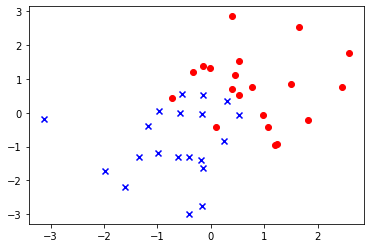

In [13]:
# Une fois les importations faites, les fonctions de utils sont utilisables en mettant
# ut. devant leur nom:

# Exemple d'utilisation:
np.random.seed(42)   # on prend 42 comme graine

d_desc_gauss, d_lab_gauss = ut.genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-0.5,-1]),np.array([[1,0],[0,1]]),20)

print("Taille du dataset généré :", np.shape(d_desc_gauss), "exemples")

# Affichage :
ut.plot2DSet(d_desc_gauss,d_lab_gauss)

Accuracy :  0.525


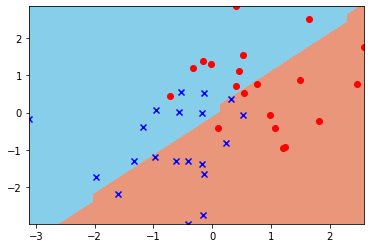

In [14]:
# De même, les classes de Classifiers sont utilisables en mettant classif. devant leur nom:
# Création d'un perceptron
perceptron = classif.ClassifierPerceptron(2,0.01)

data = d_desc_gauss
label = d_lab_gauss

perceptron.train(data, label)
print("Accuracy : ", perceptron.accuracy(data,label))

# Affichage de la frontière de séparation des classes
ut.plot_frontiere(data,label,perceptron)
ut.plot2DSet(data,label)

Voilà, à partir de maintenant, vous pourrez donc ainsi réutiliser dans vos notebooks des classes et des fonctions écrites précédemment sans avoir à recopier tout le code implémenté !

Une dernière chose, voici les commandes **TRES** utiles de la boite ci-dessous pour recharger automatiquement les librairies lorsqu'elles ont été modifiées lors de l'utilisation du notebook.

In [15]:
# Les instructions suivantes sont TRES utile pour recharger automatiquement 
# le code modifié dans les fichiers externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fonctions d'affichages avancées

Dans cette première partie, nous abordons deux choses: 
1. un complément sur les fonctions d'affichage
1. un petit complément sur le perceptron

Commençons donc par l'affichage. L'idée est de faire un mini tutoriel sur l'affichage 3D, les isocontours etc... Dans toutes ces situations, il faut d'abord créer une grille de points puis évaluer votre fonction sur tous les points de la grille. Les fonctions proposées se chargent de l'interpolation entre les points de la grille. 

Il faut ensuite penser à ajouter les points du jeu de données et à sauvegarder le tout.

Ces nouvelles fonctions vont vous permettre de bien comprendre ce qui se passe en terme de décision dans l'espace de représentation des points.

In [55]:
def plot_frontiere_V3(desc_set, label_set, w, kernel, step=30, forme=1, fname="out/tmp.pdf"):
    """ desc_set * label_set * array * function * int * int * str -> NoneType
        Note: le classifieur linéaire est donné sous la forme d'un vecteur de poids pour plus de flexibilité
    """
    # ETAPE 1: construction d'une grille de points sur tout l'espace défini par les points du jeu de données
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    #
    #Si vous avez du mal à saisir le concept de la grille, décommentez ci-dessous
#     plt.figure()
#     plt.scatter(grid[:,0],grid[:,1])
#     if True:
#        return
    #
    # ETAPE 2: calcul de la prediction pour chaque point de la grille
    res=np.array([kernel(grid[i,:])@w for i in range(len(grid))])
    # pour les affichages avancés, chaque dimension est présentée sous la forme d'une matrice
    res=res.reshape(x1grid.shape) 
    #
    # ETAPE 3: le tracé
    #
    # CHOIX A TESTER en décommentant:
    # 1. lignes de contours + niveaux
    if forme <= 2 :
        fig, ax = plt.subplots() # pour 1 et 2
        ax.set_xlabel('X_1')
        ax.set_ylabel('X_2')
    if forme == 1:
        CS = ax.contour(x1grid,x2grid,res)
        ax.clabel(CS, inline=1, fontsize=10)
    #
    # 2. lignes de contour 0 = frontière 
    if forme == 2:
        CS = ax.contour(x1grid,x2grid,res, levels=[0], colors='k')
    #
    # 3. fonction de décision 3D
    if forme == 3 or forme == 4:
        fig = plt.gcf()
        ax = fig.gca(projection='3d') # pour 3 et 4
        ax.set_xlabel('X_1')
        ax.set_ylabel('X_2')
        ax.set_zlabel('f(X)')
    # 
    if forme == 3:
        surf = ax.plot_surface(x1grid,x2grid,res, cmap=cm.coolwarm)
    #
    # 4. fonction de décision 3D contour grid + transparence
    if forme == 4:
        norm = plt.Normalize(res.min(), res.max())
        colors = cm.coolwarm(norm(res))
        rcount, ccount, _ = colors.shape
        surf = ax.plot_surface(x1grid,x2grid,res, rcount=rcount, ccount=ccount, facecolors=colors, shade=False)
        surf.set_facecolor((0,0,0,0))
    #
    # ETAPE 4: ajout des points
    negatifs = desc_set[label_set == -1]     # Ensemble des exemples de classe -1
    positifs = desc_set[label_set == +1]     # +1 
    # Affichage de l'ensemble des exemples en 2D:
    if forme <= 2:
        ax.scatter(negatifs[:,0],negatifs[:,1], marker='o', c='b') # 'o' pour la classe -1
        ax.scatter(positifs[:,0],positifs[:,1], marker='x', c='r') # 'x' pour la classe +1
    else:
        # on peut ajouter une 3ème dimension si on veut pour 3 et 4
        ax.scatter(negatifs[:,0],negatifs[:,1], -1, marker='o', c='b') # 'o' pour la classe -1
        ax.scatter(positifs[:,0],positifs[:,1], 1,  marker='x', c='r') # 'x' pour la classe +1
    #
    # ETAPE 5 en 3D: régler le point de vue caméra:
    if forme == 3 or forme == 4:
        ax.view_init(20, 70) # a régler en fonction des données
    #
    # ETAPE 6: sauvegarde
    if fname != None:
        # avec les options pour réduires les marges et mettre le fond transprent
        plt.savefig(fname,bbox_inches='tight', transparent=True,pad_inches=0)

La boite suivante permet de tester la fonction `plot_frontiere_V3`.

**Important**: avant de l'exécuter, créer le répertoire `out` dans le répertoire courant (celui qui contient ce notebook). Ce répertoire `out` est utilisé pour sauvegarder, au format PDF, les figures obtenues.

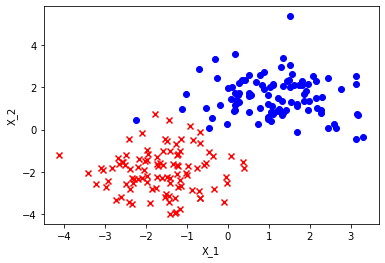

In [56]:
np.random.seed(42)   # on prend 42 comme graine

# test de la fonction ci-dessus
# NOTE: le test est générique... Mais il est améliorable en déléguant la génération de données
# aux fonctions que vous avez mise en place dans utils

# Génération rapide d'un jeu de données 2D:
N = 100
sig1  = np.array([[1, 0],[0,1]])
sig2  = np.array([[1, 0],[0,1]])
mu1   = np.array([-1.5, -2])
mu2   = np.array([1, 1.5])
sig_b = 3
Y = np.array([1]*N + [-1]*N)
X = np.random.randn(2*N,2)
X[Y==1]  = X[Y==1]  @ sig1 + mu1
X[Y==-1] = X[Y==-1] @ sig2 + mu2

w = np.array([1, 1])


def k_id(x): # fonction identité (juste pour être compatible avec les kernels ensuite)
    return x

f = 0 # A tester : 0, 1, 2, 3, 4 
plot_frontiere_V3(X, Y, w, k_id, step=10, forme = f, fname="out/test"+str(f)+".pdf")
# REMARQUE: l'extention peut être changée en ".png" pour générer un fichier image en PNG.

Aller dans le répertoire `out` avec un navigateur de fichier et ouvrir le fichier `test0.pdf` obtenu.

## Compléments sur le perceptron

Afin de compléter notre classe `ClassifierPerceptron`, nous allons ajouter:
- un biais qui facilite la convergence du modèle: le critère de mauvaise classification devient
$$ f(\mathbf x_i) y_i < 1 $$
On veut que $f(\mathbf x_i)$ et $y_i$ soient du même signe ET que $f(\mathbf x_i)$ soit suffisamment grand (en valeur absolue)
- un attribut booléen ```history``` (initialisé à False par défaut) qui, quand il est à ```True``` va déclencher la sauvegarde de toutes les mises à jour des paramètres ```w```
- un attribut ```allw``` (par exemple, de type liste) pour stocker toutes les valeurs successives de ```w```. Cet attribut est donc à mettre jour lors de l'entraînement du perceptron, après chaque mise à jour des poids.

Une fois la modification de la classe `ClassifierPerceptron` effectuée, le code suivant doit être fonctionnel et vous allez obtenir quelque chose de la forme:
<img src="./ressources/cvg.png" width=400px>

**Note:** de manière générale, pour surcharger un objet/une fonction qui marche bien avec de nouvelles fonctionnalités, il faut impérativement passer par des arguments avec une valeur par défaut pour préserver la rétro-compatibilité.

Par exemple:

        def __init__(self, input_dimension, learning_rate, history=False):
        ...

permet de rajouter un nouvel argument (`history`) dont la valeur par défaut est ```False```, ainsi, si on ne donne que 2 paramètres lors de l'appel, l'argument `history` sera quand même défini et mis à ```False```.



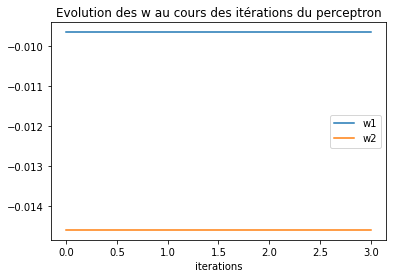

In [35]:
np.random.seed(42)   # on prend 42 comme graine

# Paramètres pour le perceptron:
dim = 2
eps = 5e-3

# Création et entraînement du perceptron sur les données générées
perc = classif.ClassifierPerceptron(dim, eps, history=True)
perc.train(X, Y)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
allw = np.array(perc.allw) # si allw est sous forme de liste

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

# Sauvegarde de la figure obtenue:
plt.savefig('out/cvg.png')

## Animation de l'évolution du perceptron

En combinant la récupération de tous les $w$ et les affichages précédents, on peut représenter l'évolution de de la frontière de décision au cours des itérations...

Attention, si le problème est trop simple, ça va converger une 1 itération et il n'y aura plus rien à voir !!

In [59]:
# tout le code est fourni, ce n'est que de l'affichage
# on génère les images associées à l'évolution de l'algo
for i in range(20): # borne arbitraire (ca converge très vite sur les cas simples)
    plot_frontiere_V3(X, Y, allw[i], k_id, step=10, forme = 4, fname="out/evol_percep_{:02}.pdf".format(i))
    plt.clf() # pour ne pas que les plot se superposent

IndexError: index 4 is out of bounds for axis 0 with size 4

<Figure size 432x288 with 0 Axes>

In [34]:
# si vous avez convert/imagemagick installé sur votre ordinateur: => Faire un gif animé :)
# rapppel: avec le !, vous invoquez des commandes dans la console
!convert -delay 50 -antialias -dispose previous out/evol_percep_* out/anim_pcp.gif

ParamŠtre non valide - 50


Vous pouvez alors obtenir quelquechose comme:
<img src="ressources/anim_pcp.gif">

**ATTENTION**: la commande précédente génére beaucoup de fichiers dans votre répertoire `out`, pensez à les supprimer une fois que vous n'en avez plus besoin pour ne pas encombrer votre espace disque...

# Lien avec l'optimisation des fonctions de coût

Après ces rappels de code, nous entrons maintenant dans le vif du sujet !

Nous avons vu en cours que l'évolution des poids du perceptron correspond en réalité à l'optimisation de la fonction coût:

$$ \mathcal C = \sum_{i=1}^N (1- f(\mathbf x_i) y_i)_+, \qquad \mbox{avec: } 
(\alpha)_+ = \left\{\begin{array}{ll}
\alpha & \mbox{ si } \alpha >0\\
0 & \mbox{ sinon }
\end{array}\right.$$

Nous utilisons ici une version *stabilisée* du perceptron où les points ne sont bien classé que lorsque $f(\mathbf x_i) y_i>1$

Le perceptron est une simple descente de gradient.


Les questions que l'on se pose sont double:
1. Quelle est l'évolution de $\mathcal C$ au cours des itérations
1. Quel chemin prennent les $w$ dans le cas 2D?

<font color="RED" size="+1">[Q]</font> Donner les instructions qui permettent de tracer l'évolution du coût au cours des itérations d'apprentissage;

In [ ]:
# calcul de C pour les différentes valeurs de w puis affichage de la courbe correspondante



Vous devriez obtenir la courbe suivante:

<img src="ressources/cost.png">

In [ ]:
# Evolution des poids dans l'espace des paramètres
# le code est presque entièrement donné... Sauf une ligne critique
# Il faut absolument comprendre la signification du code et de l'image produite

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# 2. Evaluation du cout pour toutes ces solutions potentielles

##########
# LIGNE A COMPLETER:
# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# res = # compléter



Vous devriez obtenir la courbe suivante:
    <img src="ressources/espace_param.png">
    
La solution initiale $w=[0,0]$ correspond à un coût élevé. L'algorithme du perceptron fait évoluer les poids du modèle pou aller dans une zone de l'espace où le cout est moindre.

**ATTENTION** à ne pas confondre l'espace de représentation des points (où les axes sont $X_1,X_2$) et l'espace de représentation des paramètres (ici, où chaque point correspond à un classifieur associé à un niveau de coût = le fait de faire plus ou moins d'erreurs)

## Interaction entre l'espace des paramètres et l'espace des points

Afin de bien clarifier les choses et de jouer un peu avec l'outil informatique, je vous propose une mettre en place  l'expérience suivante:

Un affichage de l'espace des paramètres (comme ci-dessus) qui deviennent cliquable afin que l'on visualise un classifieur en particulier dans l'espace des points cette fois.

1. Nous allons utiliser ```bokeh``` qui est la librairie qui marche le mieux pour ce genre d'opération
1. Nous allons reprendre le plot ci-dessus et récupérer les coordonnées des clics. 
    1. un clic = des coordonnées $w_1,w_2$ = un classifieur
1. Nous allons alors tracer le classifieur associé.

Le code est un peu moche... Mais tout est donné.
Votre travail est un travail de reflexion sur l'interprétation des figures proposées.

In [ ]:
# import pour bokeh
# a installer si besoin:
# !pip install bokeh

import yaml

from bokeh.layouts import *
from bokeh.models import ColumnDataSource, Slider
from bokeh.plotting import figure
from bokeh.themes import Theme
from bokeh.io import show, output_notebook
from bokeh.events import Tap,DoubleTap

output_notebook()

In [ ]:
def get_contour_data(X, Y, Z, levels=None):
    if levels == None:
        cs = plt.contour(X, Y, Z) # matplotlib => bokeh
    else:
        cs = plt.contour(X, Y, Z, levels) # matplotlib => bokeh
    xs = []
    ys = []
    xt = []
    yt = []
    col = []
    text = []
    isolevelid = 0
    for isolevel in cs.collections:
        isocol = isolevel.get_color()[0]
        thecol = 3 * [None]
        theiso = str(cs.get_array()[isolevelid])
        isolevelid += 1
        for i in range(3):
            thecol[i] = int(255 * isocol[i])
        thecol = '#%02x%02x%02x' % (thecol[0], thecol[1], thecol[2])

        for path in isolevel.get_paths():
            v = path.vertices
            x = v[:, 0]
            y = v[:, 1]
            xs.append(x.tolist())
            ys.append(y.tolist())
            xt.append(x[len(x) // 2])
            yt.append(y[len(y) // 2])
            text.append(theiso)
            col.append(thecol)

    data = dict({'xs': xs, 'ys': ys, 'line_color': col,'xt':xt,'yt':yt,'text':text})
    return data


In [ ]:
# il faut les variables globales suivantes:
# - allw
# - current_w : classifieur courant
# - X, Y

current_w = allw[0]

def bkapp(doc):
    #######
    # calculs coté paramètres
    mmax=allw.max(0)
    mmin=allw.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    res = np.array([np.maximum(1 - X@w * Y, 0).sum() for w in grid ])
    res=res.reshape(x1grid.shape) 
    ######
    # calculs coté modèle
    mmax=X.max(0)
    mmin=X.min(0)
    x3grid,x4grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
    grid=np.hstack((x3grid.reshape(x3grid.size,1),x4grid.reshape(x4grid.size,1)))
    f = (grid @ current_w).reshape(x3grid.shape)
    
    #####
    # Figure paramètres
    param = figure(x_axis_label='w_1', #y_range=(0, 25),
                  y_axis_label='w_2',
                  title="Espace des paramètres")
    source = ColumnDataSource(data=get_contour_data(x1grid,x2grid,res))
    param.multi_line(xs='xs', ys='ys', line_color='line_color', source=source)
    param.text(x='xt',y='yt',text='text',source=source,text_baseline='middle',text_align='center')
    
    param.scatter(allw[:,0], allw[:,1], marker='o')
    param.scatter(current_w[0], current_w[1], marker='*',size=15)
    
    
    #####
    # Figure modèle    
    plot = figure(x_axis_label='X_1', #y_range=(0, 25),
                  y_axis_label='X_2',
                  title="Espace des points")
    plot.scatter(X[:,0], X[:,1], marker='o', size=10, color=np.where(Y==1,'#ff0000','#0000ff'))
    source2 = ColumnDataSource(data=get_contour_data(x3grid,x4grid,f,levels=[0]))
    plot.multi_line(xs='xs', ys='ys', line_color='line_color', source=source2)
      
    #####
    # Callback
    # interaction avec les données = modification d'un dataframe panda
    def callback(event):
        current_w = np.array([event.x,event.y])
        f = (grid @ current_w).reshape(x3grid.shape)
        source2.data = get_contour_data(x3grid,x4grid,f,levels=[0]) # df
        print(current_w)
    param.on_event(Tap, callback)
    
    #####
    # Mise en forme
    doc.add_root(row(param, plot))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#DDDDDD"
                outline_line_color: white
                toolbar_location: above
                height: 400
                width: 400
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: white
    """, Loader=yaml.FullLoader))

In [ ]:
show(bkapp)

# ADALINE: la minimisation des moindres carrés

La fonction la plus connue est la fonction des moindres carrés:
$$ \mathcal C = \sum_{i=1}^N (f(\mathbf x_i) - y_i)^2$$
Il faut que $f(\mathbf x_i)$ soit le plus proche possible de $y_i$ pour faire baisser ce coût.

Dans le cas où $f$ est une fonction linéaire, on peut résoudre le problème de minimisation de la fonction de coût par descente de gradient stochastique, un peu comme pour le perceptron:

**Algorithme ADALINE:**
1. Initialisation de $\mathbf w$ aléatoire
1. Boucle 
    1. Tirage d'un point i
    1. Calcul du gradient $\nabla_{\mathbf w} \mathcal C$ (cf ci-dessous)
    1. $\mathbf w \leftarrow \mathbf w - \epsilon \nabla_{\mathbf w} \mathcal C $
    1. Test de convergence + sortie
    
Avec:
$$\nabla_{\mathbf w} \mathcal C = \mathbf x_i^T (\mathbf x_i \mathbf w - y_i) \in \mathbb R^d $$

1. Coder l'algorithme ADALINE et vérifier qu'il fonctionne bien sur des données jouet. Pour vous aider, nous vous donnons le squelette de la classe à créer dans la boîte suivante. Veuillez noter l'utilisation de `classif.Classifier` pour définir la classe mère de ce nouveau classifier.
1. Une fois que le code est fonctionnel, rajouter cette nouvelle classe dans ```Classifiers.py```. **Attention**: dans le fichier ```Classifiers.py```, il ne faudra plus utiliser `classif.` devant le nom de Classifier mais écrire:

        class ClassifierADALINE(Classifier):
        ...

1. Vérifier que vous êtes capable de tracer l'évolution des poids du classifeur comme pour le perceptron.

In [ ]:
# code de la classe pour le classifieur ADALINE

class ClassifierADALINE(classif.Classifier):
    """ Perceptron de ADALINE
    """
    #TODO: Classe à Compléter
    def __init__(self, input_dimension, learning_rate, history=False, niter_max=1000):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples
                - learning_rate : epsilon
                - history : stockage des poids w en cours d'apprentissage
                - niter_max : borne sur les iterations
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            réalise une itération sur l'ensemble des données prises aléatoirement
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

**Remarque:** à partir de maintenant, nous ne vous donnerons plus le squelette du code pour écrire la classe correspondant à un classifieur.

In [ ]:
# Test sur des données jouets
adaline = ClassifierADALINE(2, 1e-2, history=True) 
# Rappel: une fois dans Classifier.py, pensez à préfixer par cl.

# n'hésitez pas à jouer sur les paramètres
# vous pouvez supprimer temporairement l'argument history s'il n'est pas implémenté dans votre version.
# il faudra cependant l'ajouter avant de passer à la boite suivante

adaline.train(X, Y)

plot_frontiere_V3(X,Y, adaline.w, k_id, step=30, forme=1, fname=None)

In [ ]:
# Visualisation de la descente de gradient

allw = np.array(adaline.allw)

# construction d'une grille de 'toutes' les valeurs possibles de w
mmax=allw.max(0)
mmin=allw.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

# evaluation du cout pour toutes ces solutions potentielles

##########
# LIGNE A COMPLETER:
# construction de res = calcul du cout du perceptron pour tous les couples
# (w1,w2) définis dans grid

# CORRECTION
res = np.array([((X@w - Y)**2).sum() for w in grid ])

# remise en forme
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw[:,0], allw[:,1], c=np.arange(len(allw)))

plt.savefig("out/espace_param_MC.png")

# ADALINE analytique

Contrairement au perceptron, il est possible de calculer une solution analytique pour ADALINE. En effet, on peut montrer que l'annulation du gradient correspond au problème suivant:

$$ \underbrace{X^T X}_{\in \mathbb R^{d \times d}} \ \underbrace{\mathbf w}_{\in \mathbb R^{d}} = \underbrace{X^T Y}_{\in \mathbb R^{d}}$$

La fonction ```np.linalg.solve``` permet justement de résoudre un tel système d'équations linéaires.

1. Utiliser la documentation pour appliquer ```np.linalg.solve``` sur le problème qui nous intéresse et vérifier que la solution est bien intéressante.
1. Ecrire la classe `ClassifierADALINE2` qui implémente le classifieur ADALINE utilisant cette approche pour calculer la solution analytique.
1. Une fois fonctionnel, intégrer ce code dans le fichier ```Classifiers.py```

**Note:** cet algorithme n'est plus itératif, il n'y a plus de ```learning_rate``` ni d'itération max ou d'historique...

In [ ]:
# code de la classe ADALINE Analytique



In [ ]:
# reTest sur des données jouets
adaline2 = ClassifierADALINE2(2) 

# n'hésitez pas à jouer sur les paramètres
# vous pouvez supprimer temporairement l'argument history s'il n'est pas implémenté dans votre version.
# il faudra cependant l'ajouter avant de passer à la boite suivante

adaline2.train(X, Y)

plot_frontiere_V3(X,Y, adaline2.w, k_id, step=30, forme=1, fname=None)

# Comparer le résultat avec celui obtenu avec adaline.

## Pour aller plus loins sur ADALINE [OPTIONNEL]

L'algorithme est évidemment kernelisable et régularisable: vous pouvez ajouter des arguments avec des valeurs par défaut dans vos objets.

**Note:** ces questions sont optionnelles, il faut d'abord traiter de la section suivante sur la validation croisée.

# Validation Croisée

La procédure de la validation croisée est au centre de la plupart des applications de machine learning: il est temps pour nous de travailler sur une implémentation.

L'idée est de concevoir la fonction suivante:
```
Xapp,Yapp,Xtest,Ytest = crossval(X, Y, n_iterations, iteration)
```
- ```X, Y``` sont les donnnées **mélangées**.
- ```n_iterations``` le nombre d'ensembles de données de test disjoints total.
- ```iteration``` l'itération concernée: on ne renvoit pas les mêmes données en fonction des itérations.

Après séparation des indices en ```n_iterations``` groupes, isoler 1 groupe pour le test et les autres pour l'apprentissage.

**Note** Pour mélanger les données, vous pourrez utiliser les commandes suivantes:
```
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

# check: malgré le mélange, les données doivent être les mêmes
plt.figure()
plt.scatter(Xm[Ym==1,0], Xm[Ym==1,1], c='b')
plt.scatter(Xm[Ym==-1,0], Xm[Ym==-1,1], c='r')
```
**Note 2** Pour bien faire les choses (=dans une version 2), il faut séparer les ensembles par classe de données pour garantir qu'il n'y a pas de sous-ensembles deséquilibrés par rapport aux autres. 


In [ ]:
# code de la validation croisée

def crossval(X, Y, n_iterations, iteration):
    # A COMPLETER
    return Xapp, Yapp, Xtest, Ytest



## Sanity check sur la validation croisée

In [ ]:
N = 24
Xtoy = np.arange(N).reshape(N,1)
Ytoy = np.array([-1]*(N//2) + [1]*(N//2))

niter = 3
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(Xtoy, Ytoy, niter, i)
    print("========== ITERATION : ",i," ==========")
    print(Xapp.T,"\n",Yapp,"\n",Xtest.T,"\n", Ytest)

Check [version non stratifiée]:

```
========== ITERATION :  0  ==========
[[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]] 
 [-1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1] 
 [[0 1 2 3 4 5 6 7]] 
 [-1 -1 -1 -1 -1 -1 -1 -1]
========== ITERATION :  1  ==========
[[ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23]] 
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 [[ 8  9 10 11 12 13 14 15]] 
 [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  2  ==========
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]] 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1] 
 [[16 17 18 19 20 21 22 23]] 
 [1 1 1 1 1 1 1 1]
```
 
 [Version stratifée par classe]:
 
```
 ========== ITERATION :  0  ==========
[[ 4  5  6  7  8  9 10 11 16 17 18 19 20 21 22 23]] 
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 [[ 0  1  2  3 12 13 14 15]] 
 [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  1  ==========
[[ 0  1  2  3  8  9 10 11 12 13 14 15 20 21 22 23]] 
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 [[ 4  5  6  7 16 17 18 19]] 
 [-1 -1 -1 -1  1  1  1  1]
========== ITERATION :  2  ==========
[[ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]] 
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1] 
 [[ 8  9 10 11 20 21 22 23]] 
 [-1 -1 -1 -1  1  1  1  1]
```


## Tests de la procédure de validation croisée 

Sur des données réelles et sur des données jouets


In [ ]:
np.random.seed(42)   # on prend 42 comme graine
# test sur les données jouet X, Y supposées pré-existantes

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]
niter = 10
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval(Xm, Ym, niter, i)
    adal = ClassifierADALINE(2, 1e-2)
    adal.train(Xapp, Yapp)
    perf.append(adal.accuracy(Xtest, Ytest))
    
print("Perf ",perf)

In [ ]:
# test sur les données USPS

data = pkl.load(open('ressources/usps.pkl', 'rb'))
Xu = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Yu = np.array(data['Y_train'], dtype=float)

# Création d'un sous groupe de données
c1 = 4
c2 = 6
X12 = Xu[(Yu==c1) | (Yu==c2)]
Y12 = np.where(Yu[(Yu==c1) | (Yu==c2)]==1, 1, -1)


# Performances en Training  et Test:


# Retour sur le multi-classes

On ne va pas définir une version multi-classe par classifieur binaire...
Il est possible de définir un classifieur générique multi-classe à partir de classifieur binaire (design pattern composite) en respectant le schéma suivant:

1. ```ClassifierMultiOAA``` prend un classifieur binaire en argument lors de la création. Il initialise une liste vide de classifieurs.

1. Dans la méthode ```train```, penser à cloner le classifeur de référence nCl fois.
Il faut utiliser la méthode ```deepcopy``` du module standard python ```copy```

1. Dans un boucle for, redéfinir les étiquette $ytmp$ et apprendre des classifieurs binaires

1. Dans ```score``` faire appel aux méthodes ```score``` des classifieurs binaires et stocker les résultats

1. Dans ```predict``` renvoyer l'argmax des scores.<BR>
**Note:** en faisant cette opération, on fait l'hypothèse que les étiquettes sont définies sur $[0,nCl]$. Pour lever cette hypothèse, il faudrait stocker les classes et convertir le résultat de argmax.

1. La fonction ```accuracy``` de la classe mère doit être compatible avec les définitions précédentes... Par exemple:
```
def accuracy(self, desc_set, label_set):
        yhat = np.array([self.predict(x) for x in desc_set])
        return np.where(label_set == yhat, 1., 0.).mean()
```



In [ ]:
# Definition de la classe ClassifierMultiOAA

# Vous pouvez avoir besoin d'utiliser la fonction deepcopy de la librairie standard copy:
# (cf. la documentation)
import copy 


In [ ]:
# opération assez couteuse sur toutes les données !
# A faire dans une boite séparée

index = np.random.permutation(len(Yu))
Xm = Xu[index]
Ym = Yu[index]


In [ ]:
# validation croisée en multi-classes

# (à compléter)

In [ ]:
# Performances en Training  et Test
